# Supervised, Semi-Supervised, and Unsupervised Learning


### (a) Dataset  
Download the **Breast Cancer Wisconsin (Diagnostic) Data Set** from:  
[https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).  


This dataset contains **IDs**, **classes** (Benign = B, Malignant = M), and **30 attributes**. There are two output classes.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter, defaultdict

import warnings
warnings.filterwarnings("ignore")



### (b) Monte Carlo Simulation  

Repeat the following procedures for supervised, semi-supervised, and unsupervised learning $M = 30$ times. Use randomly selected train and test data ensuring 20% of both the positive and negative classes are in the test set. Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) obtained from each algorithm:  


In [2]:
header = [
    "ID",
    "Diagnosis",
    "Mean Radius",
    "Mean Texture",
    "Mean Perimeter",
    "Mean Area",
    "Mean Smoothness",
    "Mean Compactness",
    "Mean Concavity",
    "Mean Concave Points",
    "Mean Symmetry",
    "Mean Fractal Dimension",
    "Radius SE",
    "Texture SE",
    "Perimeter SE",
    "Area SE",
    "Smoothness SE",
    "Compactness SE",
    "Concavity SE",
    "Concave Points SE",
    "Symmetry SE",
    "Fractal Dimension SE",
    "Worst Radius",
    "Worst Texture",
    "Worst Perimeter",
    "Worst Area",
    "Worst Smoothness",
    "Worst Compactness",
    "Worst Concavity",
    "Worst Concave Points",
    "Worst Symmetry",
    "Worst Fractal Dimension"
]

wdbc_data = pd.read_csv('../data/breast+cancer+wisconsin+diagnostic/wdbc.data', names=header)
wdbc_data

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# class_M = wdbc_data[wdbc_data['Diagnosis'] == 'M']
# class_B = wdbc_data[wdbc_data['Diagnosis'] == 'B']

# train_M, test_M = train_test_split(class_M, test_size=0.2)
# train_B, test_B = train_test_split(class_B, test_size=0.2)

# train_data = pd.concat([train_M, train_B])
# test_data = pd.concat([test_M, test_B])
# train_data.drop(columns=['ID'], inplace=True)
# test_data.drop(columns=['ID'], inplace=True)
# train_data.reset_index(drop=True, inplace=True)
# test_data.reset_index(drop=True, inplace=True)
# train_data


#### i. Supervised Learning  
- Train an $L_1$-penalized SVM to classify the data.  
- Use 5-fold cross-validation to choose the penalty parameter.  
- Use normalized data.  
- Report the average accuracy, precision, recall, F1-score, and AUC for both training and test sets over $M$ runs.  
- Plot the ROC curve and report the confusion matrix for training and testing in one of the runs.  


In [4]:
def data_processing(wdbc_data):
    class_M = wdbc_data[wdbc_data['Diagnosis'] == 'M']
    class_B = wdbc_data[wdbc_data['Diagnosis'] == 'B']

    train_M, test_M = train_test_split(class_M, test_size=0.2)
    train_B, test_B = train_test_split(class_B, test_size=0.2)

    train_data = pd.concat([train_M, train_B])
    test_data = pd.concat([test_M, test_B])
    train_data.drop(columns=['ID'], inplace=True)
    test_data.drop(columns=['ID'], inplace=True)
    train_data.reset_index(drop=True, inplace=True)
    test_data.reset_index(drop=True, inplace=True)

    X_train = train_data.drop(columns=['Diagnosis'])
    y_train = train_data['Diagnosis']
    y_train = y_train.map({'M': 1, 'B': 0})
    X_test = test_data.drop(columns=['Diagnosis'])
    y_test = test_data['Diagnosis']
    y_test = y_test.map({'M': 1, 'B': 0})

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, y_train, X_test_scaled, y_test

In [5]:
M = 30
param_grid = {
    'C': np.logspace(-2, 2, 10)
}

metrics = {
    'train_accuracy': [],
    'test_accuracy': [],
    'train_precision': [],
    'test_precision': [],
    'train_recall': [],
    'test_recall': [],
    'train_f1_score': [],
    'test_f1_score': [],
    'train_auc': [],
    'test_auc': []
}

for _ in range(M):
    X_train_scaled, y_train, X_test_scaled, y_test = data_processing(wdbc_data)
    
    svm = LinearSVC(penalty='l1', dual=False)
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    best_svm = grid_search.best_estimator_
    best_svm.fit(X_train_scaled, y_train)

    y_train_pred = best_svm.predict(X_train_scaled)
    y_test_pred = best_svm.predict(X_test_scaled)

    y_train_prob = best_svm.decision_function(X_train_scaled)
    y_test_prob = best_svm.decision_function(X_test_scaled)

    metrics['train_accuracy'].append(accuracy_score(y_train, y_train_pred))
    metrics['test_accuracy'].append(accuracy_score(y_test, y_test_pred))
    metrics['train_precision'].append(precision_score(y_train, y_train_pred))
    metrics['test_precision'].append(precision_score(y_test, y_test_pred))
    metrics['train_recall'].append(recall_score(y_train, y_train_pred))
    metrics['test_recall'].append(recall_score(y_test, y_test_pred))
    metrics['train_f1_score'].append(f1_score(y_train, y_train_pred))
    metrics['test_f1_score'].append(f1_score(y_test, y_test_pred))
    metrics['train_auc'].append(roc_auc_score(y_train, y_train_prob))
    metrics['test_auc'].append(roc_auc_score(y_test, y_test_prob))

metrics_df = pd.DataFrame(metrics)
metrics_df.describe()

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1_score,test_f1_score,train_auc,test_auc
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.984581,0.972174,0.990524,0.982449,0.967850,0.942636,0.979029,0.961686,0.997532,0.993109
std,0.004874,0.017747,0.005439,0.019510,0.010503,0.040388,0.006709,0.024898,0.001321,0.007559
min,0.971366,0.939130,0.981481,0.931818,0.940828,0.860465,0.960725,0.913580,0.995038,0.967700
25%,0.982379,0.965217,0.987879,0.974672,0.964497,0.930233,0.976048,0.951510,0.996637,0.988534
50%,0.984581,0.973913,0.988060,0.977008,0.970414,0.953488,0.979104,0.964281,0.997291,0.996609
75%,0.986784,0.982609,0.993939,1.000000,0.974852,0.976744,0.982143,0.976606,0.998811,0.998304
max,0.993392,1.000000,1.000000,1.000000,0.982249,1.000000,0.991045,1.000000,0.999709,1.000000


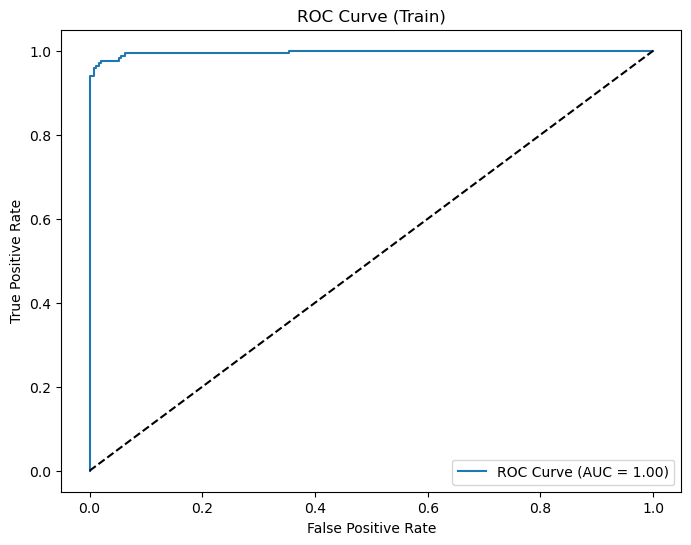

In [6]:
fpr, tpr, _ = roc_curve(y_train, y_train_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_test_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train)')
plt.legend()
plt.show()

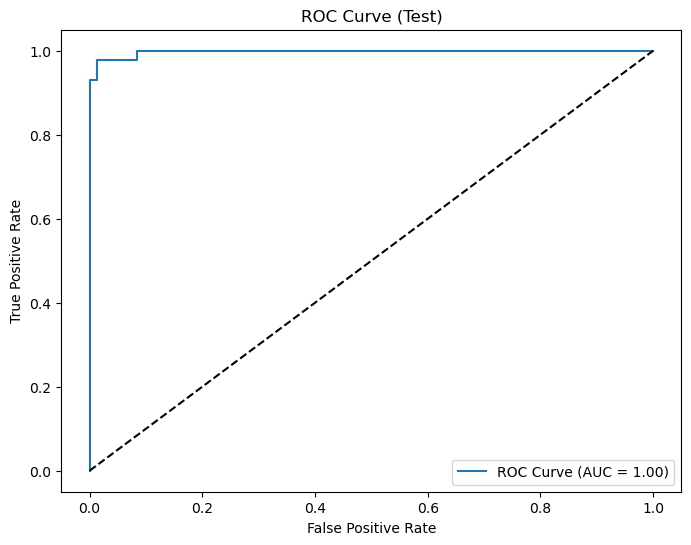

In [7]:
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_test_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test)')
plt.legend()
plt.show()

In [8]:
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("Training Confusion Matrix:\n", train_cm)
print("Testing Confusion Matrix:\n", test_cm)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Training Confusion Matrix:
 [[283   2]
 [  8 161]]
Testing Confusion Matrix:
 [[71  1]
 [ 1 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        43

    accuracy                           0.98       115
   macro avg       0.98      0.98      0.98       115
weighted avg       0.98      0.98      0.98       115




#### ii. Semi-Supervised Learning / Self-training  
- Select 50% of the positive class and 50% of the negative class in the training set as labeled data, and the rest as unlabeled data.  

**Procedure:**  
1. Train an $L_1$-penalized SVM to classify the labeled data.  
2. Use normalized data and choose the penalty parameter using 5-fold cross-validation.  
3. Find the unlabeled data point farthest from the SVM decision boundary. Let the SVM label it (ignore its true label), and add it to the labeled data. Retrain the SVM.  
4. Continue until all unlabeled data is used.  
5. Test the final SVM on the test data.  
6. Report the average accuracy, precision, recall, F1-score, and AUC for both training and test sets over $M$ runs.  
7. Plot the ROC curve and report the confusion matrix for training and testing in one of the runs.  


In [9]:
def data_processing2(wdbc_data):
    class_M = wdbc_data[wdbc_data['Diagnosis'] == 'M']
    class_B = wdbc_data[wdbc_data['Diagnosis'] == 'B']

    train_M, test_M = train_test_split(class_M, test_size=0.2)
    train_B, test_B = train_test_split(class_B, test_size=0.2)

    train_data = pd.concat([train_M, train_B])
    test_data = pd.concat([test_M, test_B])
    train_data.drop(columns=['ID'], inplace=True)
    test_data.drop(columns=['ID'], inplace=True)
    train_data.reset_index(drop=True, inplace=True)
    test_data.reset_index(drop=True, inplace=True)

    labeled_data, unlabeled_data = train_test_split(train_data, test_size=0.5)
    X_label = labeled_data.drop(columns=['Diagnosis'])
    y_train = labeled_data['Diagnosis']
    y_train = y_train.map({'M': 1, 'B': 0})
    X_unlabel = unlabeled_data.drop(columns=['Diagnosis'])
    X_test = test_data.drop(columns=['Diagnosis'])
    y_test = test_data['Diagnosis']
    y_test = y_test.map({'M': 1, 'B': 0})

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_label)
    X_unlabel_scaled = scaler.transform(X_unlabel)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, y_train, X_unlabel_scaled, X_test_scaled, y_test

In [10]:
M = 30

param_grid = {
    'C': np.logspace(-2, 2, 10)
}

metrics = {
    'train_accuracy': [],
    'test_accuracy': [],
    'train_precision': [],
    'test_precision': [],
    'train_recall': [],
    'test_recall': [],
    'train_f1_score': [],
    'test_f1_score': [],
    'train_auc': [],
    'test_auc': []
}

for _ in range(M):
    X_train_scaled, y_train, X_unlabel_scaled, X_test_scaled, y_test = data_processing2(wdbc_data)

    svm = LinearSVC(penalty='l1', dual=False)
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)
    best_svm = grid_search.best_estimator_

    while len(X_unlabel_scaled) > 0:
        decision_values = best_svm.decision_function(X_unlabel_scaled)
        farthest_idx = np.argmax(np.abs(decision_values))

        X_farthest = X_unlabel_scaled[farthest_idx].reshape(1, -1)
        pseudo_label = best_svm.predict(X_farthest)
        X_train_scaled = np.concatenate([X_train_scaled, X_farthest])
        y_train = np.concatenate([y_train, pseudo_label.ravel()])
        X_unlabel_scaled = np.delete(X_unlabel_scaled, farthest_idx, axis=0)

    best_svm.fit(X_train_scaled, y_train)
    y_train_pred = best_svm.predict(X_train_scaled)
    y_test_pred = best_svm.predict(X_test_scaled)

    y_train_prob = best_svm.decision_function(X_train_scaled)
    y_test_prob = best_svm.decision_function(X_test_scaled)

    metrics['train_accuracy'].append(accuracy_score(y_train, y_train_pred))
    metrics['test_accuracy'].append(accuracy_score(y_test, y_test_pred))
    metrics['train_precision'].append(precision_score(y_train, y_train_pred))
    metrics['test_precision'].append(precision_score(y_test, y_test_pred))
    metrics['train_recall'].append(recall_score(y_train, y_train_pred))
    metrics['test_recall'].append(recall_score(y_test, y_test_pred))
    metrics['train_f1_score'].append(f1_score(y_train, y_train_pred))
    metrics['test_f1_score'].append(f1_score(y_test, y_test_pred))
    metrics['train_auc'].append(roc_auc_score(y_train, y_train_prob))
    metrics['test_auc'].append(roc_auc_score(y_test, y_test_prob))

metrics_df = pd.DataFrame(metrics)
metrics_df.describe()

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1_score,test_f1_score,train_auc,test_auc
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.992584,0.959420,0.997112,0.969672,0.982338,0.921705,0.989630,0.944256,0.998869,0.990536
std,0.005502,0.018029,0.005049,0.034591,0.013194,0.039335,0.007848,0.025309,0.001276,0.007756
min,0.977974,0.913043,0.981928,0.906977,0.949686,0.790698,0.967949,0.871795,0.995993,0.971576
25%,0.989537,0.950000,0.993958,0.952381,0.976045,0.906977,0.985553,0.933432,0.997900,0.984981
50%,0.993392,0.960870,1.000000,0.975900,0.985079,0.930233,0.990991,0.946198,0.999561,0.992571
75%,0.995595,0.971739,1.000000,1.000000,0.992336,0.953488,0.994012,0.961528,0.999874,0.997255
max,1.000000,0.991304,1.000000,1.000000,1.000000,0.976744,1.000000,0.988235,1.000000,1.000000


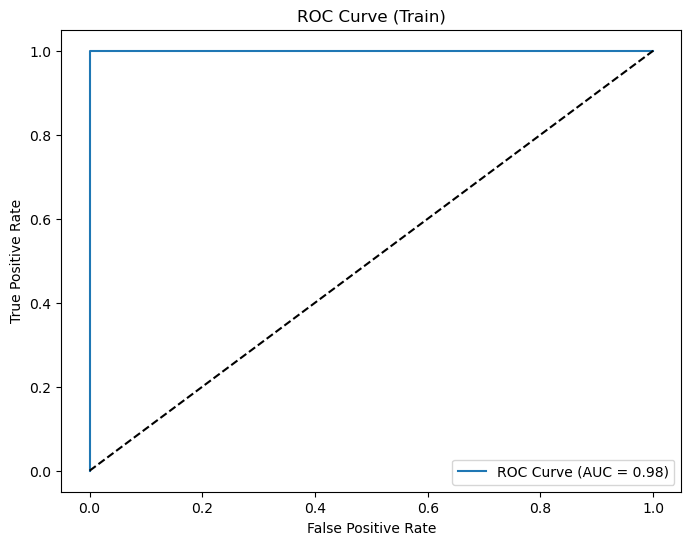

In [11]:
fpr, tpr, _ = roc_curve(y_train, y_train_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_test_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train)')
plt.legend()
plt.show()

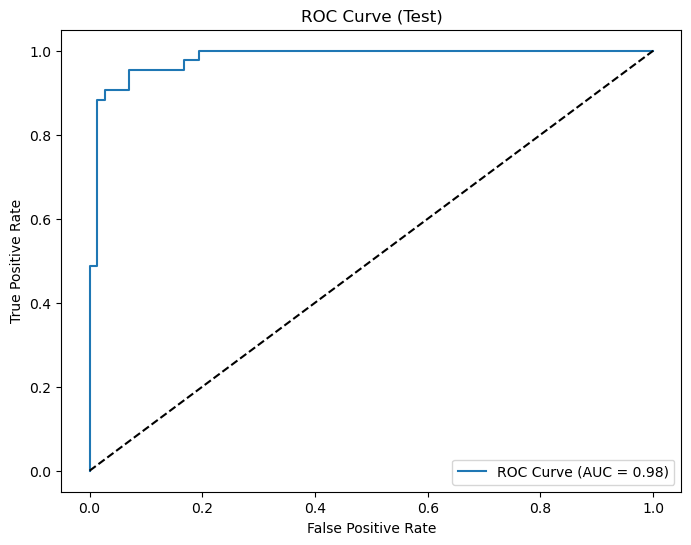

In [12]:
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_test_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test)')
plt.legend()
plt.show()

In [13]:
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("Training Confusion Matrix:\n", train_cm)
print("Testing Confusion Matrix:\n", test_cm)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Training Confusion Matrix:
 [[294   0]
 [  1 159]]
Testing Confusion Matrix:
 [[71  1]
 [ 9 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.93        72
           1       0.97      0.79      0.87        43

    accuracy                           0.91       115
   macro avg       0.93      0.89      0.90       115
weighted avg       0.92      0.91      0.91       115




#### iii. Unsupervised Learning  
Run the $k$-means algorithm on the entire training set. Ignore the labels of the data and assume $k = 2$.  

**Procedure:**  
A. Run the $k$-means algorithm multiple times with random initialization to avoid local minimum.  
B. Compute the centers of the two clusters. For each center, find the 30 closest data points and read their true labels. Use a majority poll to assign labels to each cluster.  
C. Compare the predicted labels from $k$-means with the true labels. Report the average accuracy, precision, recall, F1-score, and AUC over $M$ runs. Also, plot the ROC curve and confusion matrix for one of the runs.  
D. Classify test data based on proximity to the cluster centers. Report the average metrics and ROC for the test data over $M$ runs.  


In [14]:
M = 30
k = 2
metrics = {
    'train_accuracy': [],
    'test_accuracy': [],
    'train_precision': [],
    'test_precision': [],
    'train_recall': [],
    'test_recall': [],
    'train_f1_score': [],
    'test_f1_score': [],
    'train_auc': [],
    'test_auc': []
}

for _ in range(M):
    X_train_scaled, y_train, X_test_scaled, y_test = data_processing(wdbc_data)
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_train_scaled)

    cluster_labels = {}
    for cluster in range(k):
        cluster_indices = np.where(kmeans.labels_ == cluster)[0]
        cluster_distances = kmeans.transform(X_train_scaled)[cluster_indices, cluster]

        sorted_indices = cluster_indices[np.argsort(cluster_distances)]
        closest_30 = sorted_indices[:min(len(sorted_indices), 30)]
        closest_30_labels = y_train[closest_30]

        majority_label = Counter(closest_30_labels).most_common(1)[0][0]
        cluster_labels[cluster] = majority_label

    # Predict training labels
    predicted_labels_train = np.array([cluster_labels[label] for label in kmeans.labels_])
    metrics['train_accuracy'].append(accuracy_score(y_train, predicted_labels_train))
    metrics['train_precision'].append(precision_score(y_train, predicted_labels_train))
    metrics['train_recall'].append(recall_score(y_train, predicted_labels_train))
    metrics['train_f1_score'].append(f1_score(y_train, predicted_labels_train))

    # Compute test metrics
    predicted_labels_test = np.array([cluster_labels.get(label, -1) for label in kmeans.predict(X_test_scaled)])
    metrics['test_accuracy'].append(accuracy_score(y_test, predicted_labels_test))
    metrics['test_precision'].append(precision_score(y_test, predicted_labels_test))
    metrics['test_recall'].append(recall_score(y_test, predicted_labels_test))
    metrics['test_f1_score'].append(f1_score(y_test, predicted_labels_test))

    # Compute AUC
    metrics['train_auc'].append(roc_auc_score(y_train, predicted_labels_train))
    metrics['test_auc'].append(roc_auc_score(y_test, predicted_labels_test))

metrics_df = pd.DataFrame(metrics)
metrics_df.describe()

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1_score,test_f1_score,train_auc,test_auc
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.926358,0.924348,0.951195,0.943227,0.845759,0.849612,0.895294,0.893388,0.909956,0.909297
std,0.006381,0.015344,0.014189,0.027144,0.011622,0.035471,0.009010,0.022279,0.006826,0.018336
min,0.914097,0.904348,0.929032,0.883721,0.816568,0.790698,0.877743,0.860759,0.896657,0.881460
25%,0.920705,0.913043,0.940592,0.925000,0.840237,0.813953,0.888371,0.875000,0.905533,0.893088
50%,0.926211,0.921739,0.953177,0.945946,0.846154,0.837209,0.895154,0.890228,0.909919,0.907057
75%,0.931167,0.936957,0.960265,0.967262,0.856509,0.877907,0.901811,0.911376,0.914305,0.922723
max,0.938326,0.956522,0.973154,1.000000,0.863905,0.930233,0.911950,0.941176,0.921977,0.951227


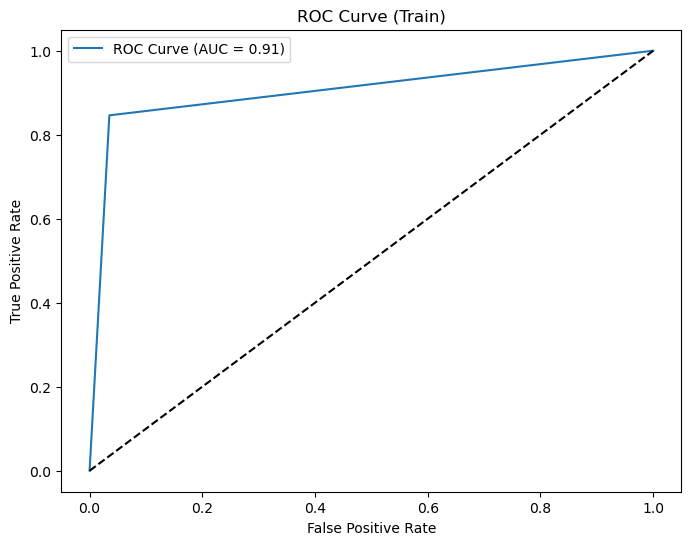

In [15]:
fpr, tpr, _ = roc_curve(y_train, predicted_labels_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_train, predicted_labels_train):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train)')
plt.legend()
plt.show()

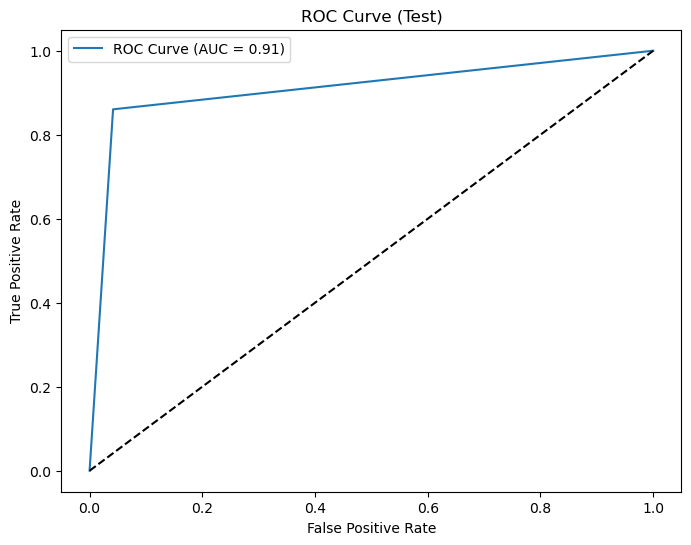

In [16]:
fpr, tpr, _ = roc_curve(y_test, predicted_labels_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, predicted_labels_test):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test)')
plt.legend()
plt.show()

In [17]:
train_cm = confusion_matrix(y_train, predicted_labels_train)
test_cm = confusion_matrix(y_test, predicted_labels_test)

print("Training Confusion Matrix:\n", train_cm)
print("Testing Confusion Matrix:\n", test_cm)
print("\nClassification Report:\n", classification_report(y_test, predicted_labels_test))

Training Confusion Matrix:
 [[275  10]
 [ 26 143]]
Testing Confusion Matrix:
 [[69  3]
 [ 6 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.93      0.86      0.89        43

    accuracy                           0.92       115
   macro avg       0.92      0.91      0.92       115
weighted avg       0.92      0.92      0.92       115




#### iv. Spectral Clustering  
- Repeat 1(b)iii using spectral clustering based on kernels.  
- Use an RBF kernel with $\gamma = 1$ or adjust $\gamma$ so that clusters have the same balance as the original dataset.  

**Procedure:**  
A. Perform clustering without proximity to cluster centers as spectral clustering may result in non-convex clusters.  
B. Use the `fit_predict` method to assign cluster labels.  


Key Steps in Spectral Clustering

1.	Construct a Similarity Graph:
- Represent the data points as nodes in a graph.
-	Define edges between nodes based on their similarity (e.g., Gaussian kernel, cosine similarity, k-nearest neighbors).
-	The graph can be represented as an adjacency matrix  A , where  $A_{ij}$  indicates the similarity between nodes  $i$  and  $j$.
2.	Compute the Laplacian Matrix:
-	Compute the graph Laplacian, which can be:
-	Unnormalized Laplacian:  $L = D - A$ , where  $D$  is the degree matrix.
-	Normalized Laplacian:  $L_{\text{sym}} = I - D^{-1/2} A D^{-1/2}$  or  $L_{\text{rw}} = I - D^{-1} A$ .
-	The Laplacian captures the structure of the graph and helps find clusters.
3.	Eigenvalue Decomposition:
-	Perform an eigenvalue decomposition of the Laplacian matrix to obtain its eigenvalues and eigenvectors.
-	Select the eigenvectors corresponding to the smallest  $k$  eigenvalues (excluding 0 for unnormalized Laplacian).
4.	Clustering in Low-Dimensional Space:
-	Use the selected eigenvectors to form a new, lower-dimensional representation of the data.
-	Apply a standard clustering algorithm (e.g., k-means) on this representation to find clusters.
5.	Assign Clusters:
-	Assign the original data points to the clusters identified in the previous step.

In [18]:
M = 30
k = 2
metrics = {
    'train_accuracy': [],
    'test_accuracy': [],
    'train_precision': [],
    'test_precision': [],
    'train_recall': [],
    'test_recall': [],
    'train_f1_score': [],
    'test_f1_score': [],
}

for _ in range(M):
    X_train_scaled, y_train, X_test_scaled, y_test = data_processing(wdbc_data)

    spectural = SpectralClustering(n_clusters=k, affinity='rbf', gamma=1, assign_labels='discretize')
    spec_labels = spectural.fit_predict(X_train_scaled)

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_scaled, spec_labels)

    cluster_labels = {}
    for cluster in range(k):
        cluster_indices = np.where(spec_labels == cluster)[0]
        
        cluster_distances = np.linalg.norm(
            X_train_scaled[cluster_indices] - np.mean(X_train_scaled[cluster_indices], axis=0), axis=1
        )
        
        sorted_indices = cluster_indices[np.argsort(cluster_distances)]
        closest_30 = sorted_indices[:min(len(sorted_indices), 30)]
        
        closest_30_labels = y_train[closest_30]
        majority_label = Counter(closest_30_labels).most_common(1)[0][0]
        cluster_labels[cluster] = majority_label

    # Predict training labels
    predicted_labels_train = np.array([cluster_labels[label] for label in spec_labels])
    metrics['train_accuracy'].append(accuracy_score(y_train, predicted_labels_train))
    metrics['train_precision'].append(precision_score(y_train, predicted_labels_train))
    metrics['train_recall'].append(recall_score(y_train, predicted_labels_train))
    metrics['train_f1_score'].append(f1_score(y_train, predicted_labels_train))

    # Predict test labels using the trained KNN classifier
    predicted_labels_test = np.array([cluster_labels[label] for label in knn.predict(X_test_scaled)])
    metrics['test_accuracy'].append(accuracy_score(y_test, predicted_labels_test))
    metrics['test_precision'].append(precision_score(y_test, predicted_labels_test))
    metrics['test_recall'].append(recall_score(y_test, predicted_labels_test))
    metrics['test_f1_score'].append(f1_score(y_test, predicted_labels_test))

metrics_df = pd.DataFrame(metrics)
metrics_df.describe()

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1_score,test_f1_score
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.913289,0.916232,0.981218,0.992304,0.782051,0.782171,0.869942,0.873607
std,0.013146,0.022777,0.005338,0.016903,0.035608,0.058414,0.022643,0.038160
min,0.876652,0.878261,0.971223,0.939394,0.674556,0.674419,0.802817,0.805556
25%,0.908590,0.904348,0.977778,1.000000,0.766272,0.744186,0.861887,0.853333
50%,0.916300,0.921739,0.978417,1.000000,0.786982,0.790698,0.874586,0.883117
75%,0.920154,0.930435,0.985267,1.000000,0.798817,0.837209,0.881634,0.900000
max,0.940529,0.956522,0.992857,1.000000,0.857988,0.883721,0.914826,0.938272


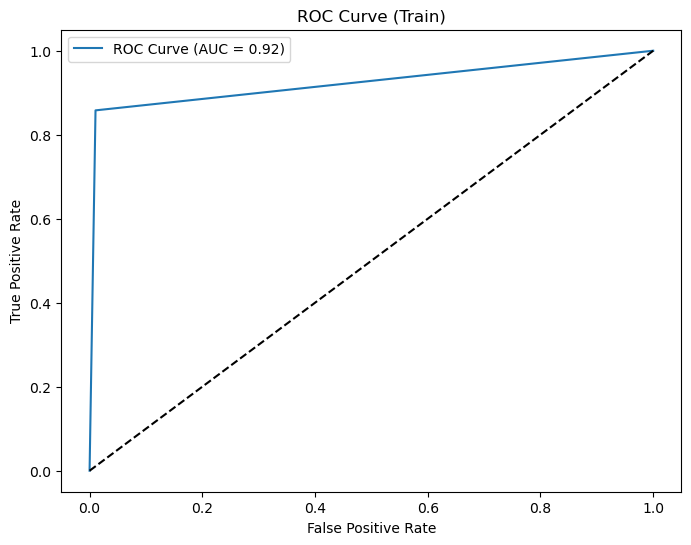

In [19]:
fpr, tpr, _ = roc_curve(y_train, predicted_labels_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_train, predicted_labels_train):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train)')
plt.legend()
plt.show()

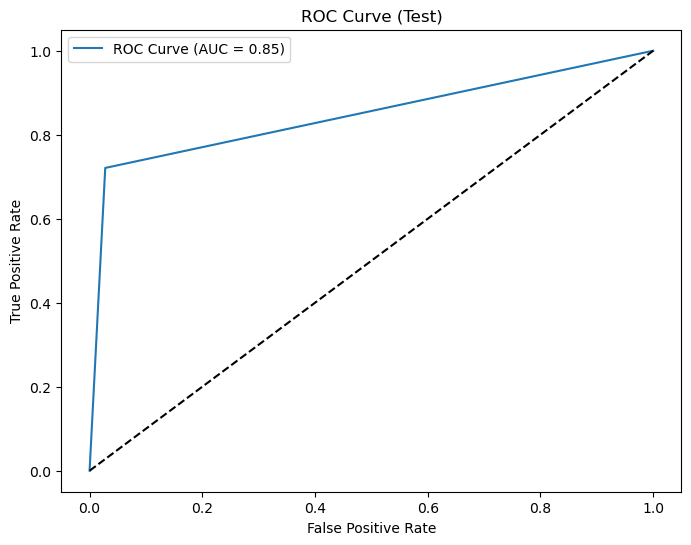

In [20]:
fpr, tpr, _ = roc_curve(y_test, predicted_labels_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, predicted_labels_test):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test)')
plt.legend()
plt.show()

In [21]:
train_cm = confusion_matrix(y_train, predicted_labels_train)
test_cm = confusion_matrix(y_test, predicted_labels_test)

print("Training Confusion Matrix:\n", train_cm)
print("Testing Confusion Matrix:\n", test_cm)
print("\nClassification Report:\n", classification_report(y_test, predicted_labels_test))

Training Confusion Matrix:
 [[282   3]
 [ 24 145]]
Testing Confusion Matrix:
 [[70  2]
 [12 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91        72
           1       0.94      0.72      0.82        43

    accuracy                           0.88       115
   macro avg       0.90      0.85      0.86       115
weighted avg       0.89      0.88      0.87       115




#### v. Analysis  
Compare the results obtained by supervised, semi-supervised, and unsupervised learning methods.  


The average accuracy between Supervised Learning and Semi-supervised Learning is very close but both are much higher than the average accuracy of Unsupervised Learning.



## Active Learning Using Support Vector Machines  



### (a) Dataset  
Download the **Banknote Authentication Data Set** from:  
[https://archive.ics.uci.edu/ml/datasets/banknote+authentication](https://archive.ics.uci.edu/ml/datasets/banknote+authentication).  

Split the dataset into **472 test points** and **900 training points**. This is a binary classification problem.  


In [22]:
header = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
banknote_data = pd.read_csv('../data/data_banknote_authentication.txt', names=header)

shuffled_data = banknote_data.sample(frac=1)
train_data = shuffled_data.iloc[:900]
test_data = shuffled_data.iloc[900:]
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
train_data

,variance,skewness,curtosis,entropy,class
0,3.53580,6.70860,-0.81857,0.47886,0
1,3.14520,5.82500,-0.51439,-1.49440,0
2,3.49160,8.57090,-3.03260,-0.59182,0
3,3.86600,-2.63830,1.92420,0.10645,0
4,-3.88580,-12.84610,12.79570,-3.13530,1
...,...,...,...,...,...
895,4.13730,0.49248,1.09300,1.82760,0
896,-4.94470,3.30050,1.06300,-1.44400,1
897,4.93420,2.41070,-0.17594,1.62450,0
898,-4.50460,-5.81260,10.88670,-0.52846,1




### (b) Learning Procedures  

Repeat each procedure **50 times** to obtain 50 errors for 90 SVMs per procedure.  



#### i. Passive Learning  
- Train an SVM with an initial pool of 10 randomly selected training points using a linear kernel and $L_1$ penalty.  
- Select the penalty parameter using 5-fold cross-validation.  
- Add another 10 random points to the training pool. Repeat until all 900 training points are used.  
- Calculate the test error for each SVM.  


In [23]:
X_train = train_data.drop(columns=['class'])
y_train = train_data['class']
X_test = test_data.drop(columns=['class'])
y_test = test_data['class']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
M = 50
test_errors = defaultdict(list)

param_grid = {
    'C': np.logspace(-2, 2, 10)
}

for i in range(M):
    train_indices = np.random.choice(len(X_train_scaled), size=10, replace=False)
    remain_indices = np.setdiff1d(np.arange(len(X_train_scaled)), train_indices)

    while len(train_indices) <= len(X_train_scaled):
        temp_X_train = X_train_scaled[train_indices]
        temp_y_train = y_train.iloc[train_indices]

        svm = LinearSVC(penalty='l1', dual=False)
        grid_search = GridSearchCV(svm, param_grid, cv=5)
        grid_search.fit(temp_X_train, temp_y_train)

        # evaluate the best model on the test set
        best_svm = grid_search.best_estimator_
        y_test_pred = best_svm.predict(X_test_scaled)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        test_errors[f'run_{i}'].append(test_error)

        # add 10 more samples to the training set
        if len(remain_indices) < 10:
            break
        new_indices = np.random.choice(remain_indices, size=10, replace=False)
        train_indices = np.concatenate([train_indices, new_indices])
        remain_indices = np.setdiff1d(remain_indices, new_indices)

test_errors_passive = pd.DataFrame(test_errors)
test_errors_passive

,run_0,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,...,run_40,run_41,run_42,run_43,run_44,run_45,run_46,run_47,run_48,run_49
0,0.173729,0.180085,0.036017,0.120763,0.190678,0.036017,0.192797,0.370763,0.396186,0.220339,...,0.175847,0.247881,0.461864,0.150424,0.112288,0.230932,0.163136,0.182203,0.338983,0.375000
1,0.169492,0.175847,0.031780,0.114407,0.023305,0.038136,0.163136,0.048729,0.031780,0.156780,...,0.095339,0.156780,0.099576,0.046610,0.067797,0.033898,0.080508,0.161017,0.029661,0.027542
2,0.029661,0.169492,0.031780,0.105932,0.027542,0.019068,0.165254,0.057203,0.036017,0.036017,...,0.088983,0.019068,0.052966,0.027542,0.025424,0.027542,0.023305,0.156780,0.029661,0.027542
3,0.036017,0.175847,0.031780,0.105932,0.027542,0.025424,0.165254,0.061441,0.023305,0.016949,...,0.137712,0.021186,0.021186,0.029661,0.023305,0.027542,0.025424,0.040254,0.057203,0.006356
4,0.019068,0.033898,0.027542,0.065678,0.029661,0.012712,0.023305,0.061441,0.023305,0.012712,...,0.118644,0.057203,0.057203,0.055085,0.029661,0.023305,0.025424,0.027542,0.069915,0.006356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.008475,0.008475,0.008475,0.008475,0.012712,0.008475,0.012712,0.012712,0.012712,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.012712
86,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.016949,0.012712,0.012712,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.016949,0.008475,0.008475,0.012712
87,0.008475,0.012712,0.008475,0.012712,0.008475,0.008475,0.016949,0.008475,0.012712,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.012712,0.008475,0.012712,0.008475,0.008475
88,0.008475,0.012712,0.008475,0.008475,0.008475,0.008475,0.008475,0.012712,0.012712,0.008475,...,0.008475,0.008475,0.008475,0.012712,0.008475,0.012712,0.008475,0.008475,0.008475,0.008475



#### ii. Active Learning  
- Train an SVM with an initial pool of 10 randomly selected training points using a linear kernel and $L_1$ penalty.  
- Select the penalty parameter using 5-fold cross-validation.  
- Add the 10 points closest to the SVM decision boundary to the training pool. Repeat until all training points are used.  
- Calculate the test error for each SVM.  



In [25]:
M = 50
test_errors = defaultdict(list)

param_grid = {
    'C': np.logspace(-2, 2, 10)
}

for i in range(M):
    train_indices = np.random.choice(len(X_train_scaled), size=10, replace=False)
    remain_indices = np.setdiff1d(np.arange(len(X_train_scaled)), train_indices)

    while len(train_indices) <= len(X_train_scaled):
        temp_X_train = X_train_scaled[train_indices]
        temp_y_train = y_train.iloc[train_indices]
        if len(np.unique(temp_y_train)) < 2:
            # skip if there is only one class in the training set
            test_errors[f'run_{i}'].append(np.nan)
            continue

        svm = LinearSVC(penalty='l1', dual=False)
        grid_search = GridSearchCV(svm, param_grid, cv=5)
        grid_search.fit(temp_X_train, temp_y_train)

        # evaluate the best model on the test set
        best_svm = grid_search.best_estimator_
        y_test_pred = best_svm.predict(X_test_scaled)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        test_errors[f'run_{i}'].append(test_error)

        # add 10 more samples to the training set
        if len(remain_indices) < 10:
            break
        X_remain = X_train_scaled[remain_indices]
        decision_values = best_svm.decision_function(X_remain)
        closest_idx = np.argsort(np.abs(decision_values))[:10]
        selected_indices = remain_indices[closest_idx]

        train_indices = np.concatenate([train_indices, selected_indices])
        remain_indices = np.setdiff1d(remain_indices, selected_indices)

test_errors_active = pd.DataFrame(test_errors)
test_errors_active

,run_0,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,...,run_40,run_41,run_42,run_43,run_44,run_45,run_46,run_47,run_48,run_49
0,0.105932,0.239407,0.158898,0.165254,0.059322,0.192797,0.194915,0.288136,0.461864,0.186441,...,0.461864,0.146186,0.315678,0.141949,0.213983,0.209746,0.218220,0.046610,0.036017,0.394068
1,0.177966,0.146186,0.029661,0.019068,0.133475,0.025424,0.036017,0.139831,0.150424,0.038136,...,0.148305,0.050847,0.074153,0.036017,0.182203,0.038136,0.059322,0.008475,0.031780,0.186441
2,0.101695,0.069915,0.080508,0.008475,0.033898,0.105932,0.019068,0.025424,0.078390,0.031780,...,0.044492,0.012712,0.019068,0.046610,0.021186,0.025424,0.012712,0.093220,0.019068,0.038136
3,0.057203,0.040254,0.031780,0.027542,0.025424,0.042373,0.008475,0.023305,0.038136,0.029661,...,0.012712,0.012712,0.012712,0.021186,0.012712,0.012712,0.016949,0.012712,0.012712,0.006356
4,0.027542,0.016949,0.222458,0.006356,0.012712,0.044492,0.010593,0.012712,0.010593,0.019068,...,0.014831,0.006356,0.044492,0.012712,0.027542,0.008475,0.008475,0.008475,0.010593,0.012712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.019068,0.023305,0.008475,0.019068,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
86,0.019068,0.023305,0.008475,0.019068,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
87,0.019068,0.023305,0.008475,0.023305,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
88,0.008475,0.023305,0.023305,0.019068,0.008475,0.008475,0.008475,0.008475,0.019068,0.008475,...,0.008475,0.008475,0.019068,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475



### (c) Learning Curve  

1. Average the 50 test errors for each incrementally trained SVM in 2(b)i and 2(b)ii.  
2. Plot the average test error vs. the number of training instances for both passive and active learners on the same graph.  
3. Report your conclusions.  

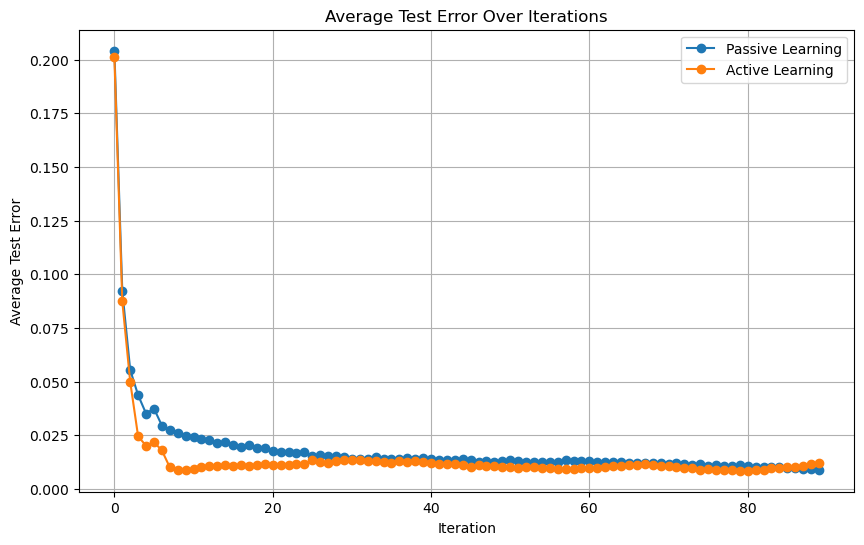

In [26]:
avg_test_errors_passive = test_errors_passive.mean(axis=1)
avg_test_errors_active = test_errors_active.mean(axis=1)
plt.figure(figsize=(10, 6))
plt.plot(avg_test_errors_passive.index, avg_test_errors_passive.values, marker='o', linestyle='-', label = 'Passive Learning')
plt.plot(avg_test_errors_active.index, avg_test_errors_active.values, marker='o', linestyle='-', label = 'Active Learning')
plt.title("Average Test Error Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Average Test Error")
plt.grid()
plt.legend()
plt.show()

The average test error in active learning decrease faster than the one in passive learning, both of them have almost the same value after 20 iterations.